In [3]:
#na dataskupu cnn i linearna
# Uvoz pandas modula za manipulaciju nad podacima.
# Alias pd za pandas se koristi po konvenciji.
import pandas as pd
# Uvoz pyplot modula za vizuelizaciju podataka.
# Alias plt za pyplot se koristi po konvenciji.
import matplotlib.pyplot as plt
# Uvoz numpy modula za rad sa visedimenzionim nizovima.
# Alias np za numpy se koristi po konvenciji.
import numpy as np
# Mapa boja (colormap) za bojenje funkcije greske
from matplotlib import cm
# Obican model Linearne regresije
from sklearn.linear_model import LinearRegression

with open('datasets/lamiija_cnn_lg.csv', 'r') as file:
    lines = file.readlines()
    # Prikazivanje prvih 10 linija fajla
    for i in range(10):
        print(f"Line {i + 1}: {lines[i]}")


Line 1: flour,eggs,sugar,milk,butter,baking_powder,type

Line 2: 181.33,1,1200.00,270.00,283.75,5.62,cupcake

Line 3: 136.00,2,1000.00,80.00,113.50,1.87,cupcake

Line 4: 136.00,3,775.00,30.00,283.75,7.50,cupcake

Line 5: 204.00,2,1000.00,120.00,340.50,6.56,cupcake

Line 6: 181.33,2,825.00,45.00,227.00,0.94,cupcake

Line 7: 110.50,2,333.33,120.00,170.25,1.87,cupcake

Line 8: 110.50,2,333.33,120.00,170.25,1.87,cupcake

Line 9: 238.00,1,900.00,180.00,170.25,5.62,cupcake

Line 10: 272.00,2,1000.00,240.00,56.75,7.50,cupcake



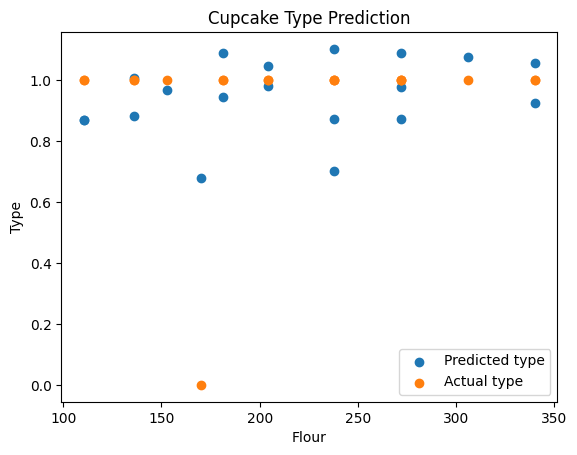

In [10]:
#Da bi primenili linearnu regresiju na ovaj skup podataka, moramo prvo odrediti koji atributi (kolone) želimo da koristimo kao ulaze (nezavisne promenljive) i koji atribut želimo da predvidimo (zavisnu promenljivu).

#Na primer da zelimo predvideti tip kolača (type) na osnovu količine sastojaka poput brašna (flour), jaja (eggs), šećera (sugar), mleka (milk), putera (butter), i praška za pecivo (baking_powder).

#Prvo, treba razdvojiti podatke na ulaze (X) i izlaz (y):
# Učitaj podatke
data = pd.read_csv('datasets/lamiija_cnn_lg.csv')

# Razdvoji podatke na ulazne i izlazne promenljive
X = data[['flour', 'eggs', 'sugar', 'milk', 'butter', 'baking_powder']]
y = data['type']
# Inicijalizujte model
model = LinearRegression()

# Koristi pd.get_dummies za enkodiranje kategoričke promenljive 'type'
type_encoded = pd.get_dummies(data['type'], prefix='type')

# Dodaj enkodirane vrednosti u DataFrame
data_encoded = pd.concat([data, type_encoded], axis=1)

# Sada izdvojte nove enkodirane kolone kao izlaz (y)
y_encoded = data_encoded[['type_cupcake']]

# Izdvojite kolone za ulaze (X)
X_encoded = data_encoded[['flour', 'eggs', 'sugar', 'milk', 'butter', 'baking_powder']]

# Trenirajte model sa enkodiranim podacima
model.fit(X_encoded, y_encoded)
# Napravite predikcije
predictions = model.predict(X)

# Prikazivanje grafika preko predvidjenih vrednosti
#Na grafu prikazujemo predviđene vrednosti tipa kolača (y-osa) u odnosu na količinu brašna (x-osa).
#Ovo je jednostavan prikaz kako linearna regresija pokušava da nauči odnos između količine brašna i tipa kolača.
#Ovde koristimo samo jedan od ulaznih atributa, tj. flour, radi jednostavnosti, ali u pravim problemima možete koristiti sve relevantne atribute koji utiču na predviđenu vrednost. 
#Scatter plot prikazuje tačke sa stvarnim vrednostima (Actual type) i tačke sa predviđenim vrednostima (Predicted type). Ako regresija funkcioniše dobro, tačke će pratiti pravac linearne regresije.
plt.scatter(X_encoded['flour'], predictions, label='Predicted type')
plt.scatter(X_encoded['flour'], y_encoded['type_cupcake'], label='Actual type')
plt.xlabel('Flour')
plt.ylabel('Type')
plt.title('Cupcake Type Prediction')
plt.legend()
plt.show()


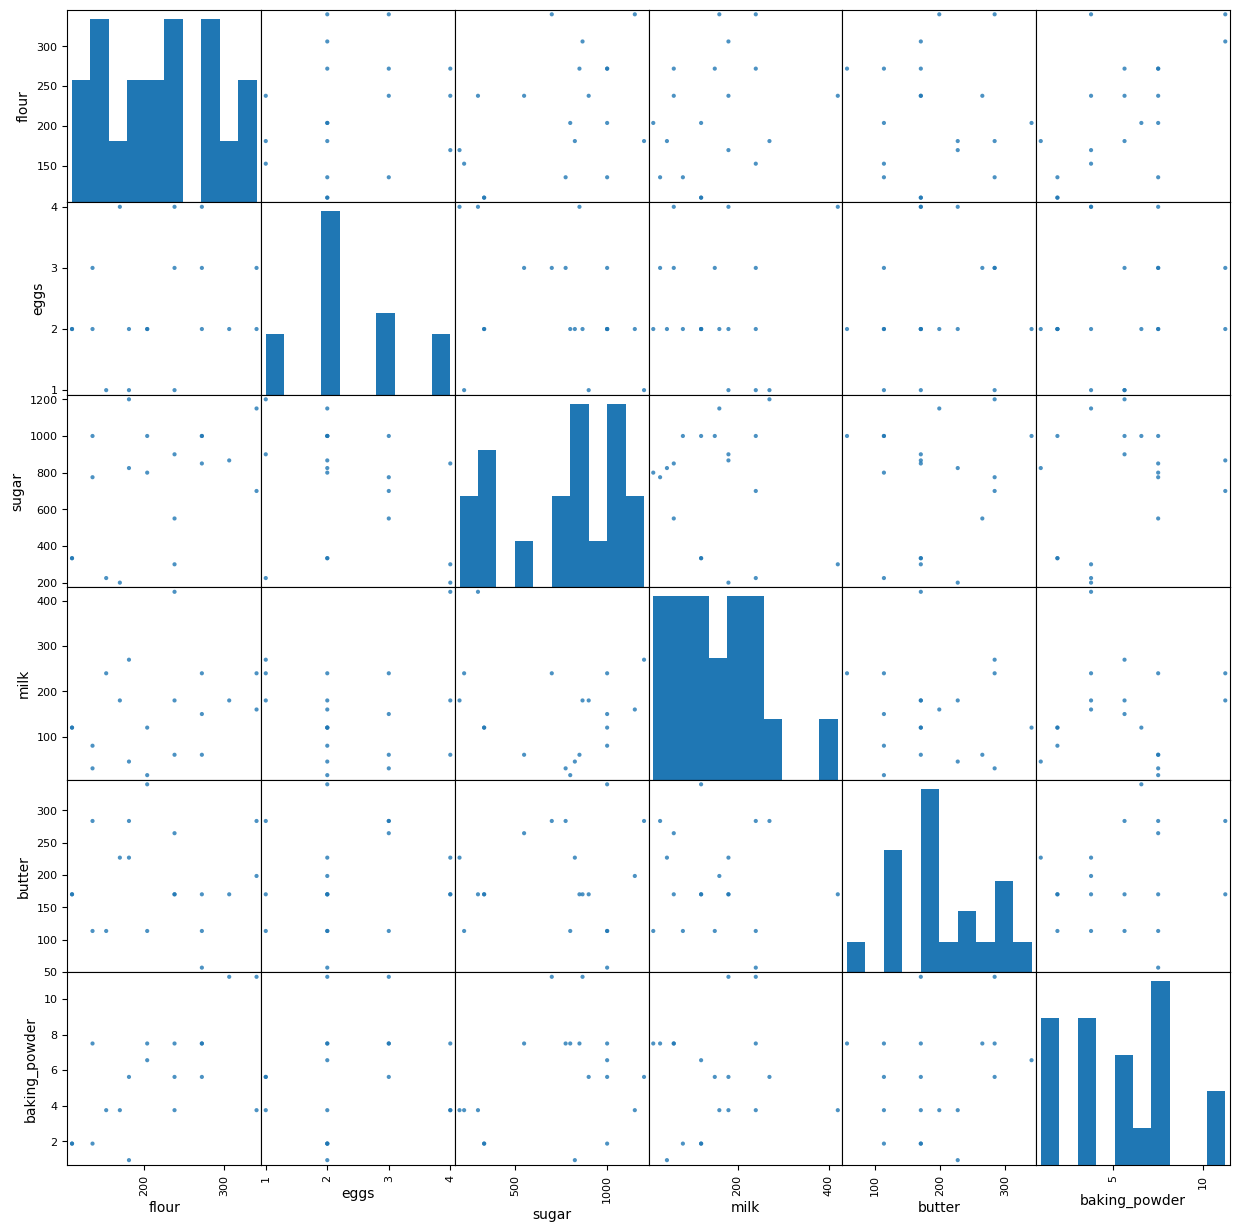

In [11]:
# Uvoz dodatnih modula
from pandas.plotting import scatter_matrix

# Prikazivanje matrice scatter plot-ova
#odnos svih atributa
scatter_matrix(data, alpha=0.8, figsize=(15, 15), diagonal='hist')
plt.show()

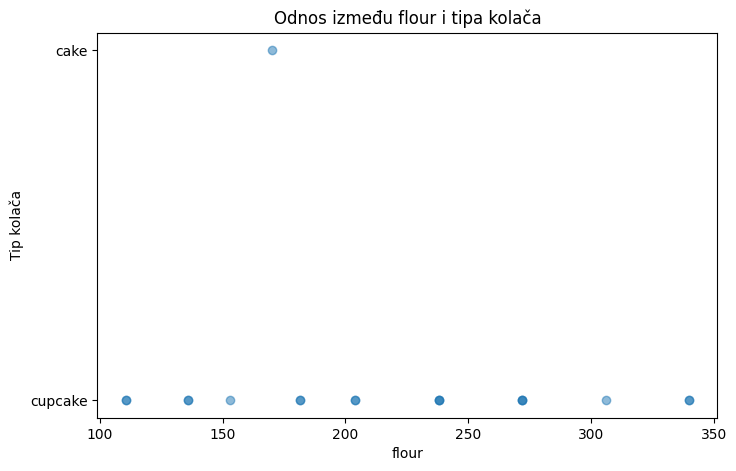

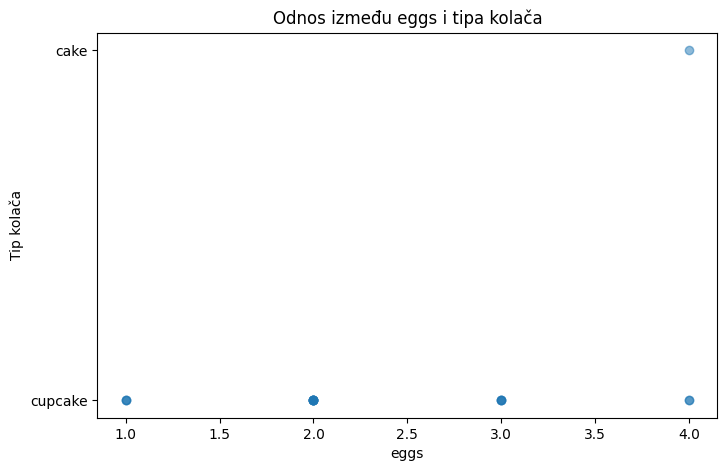

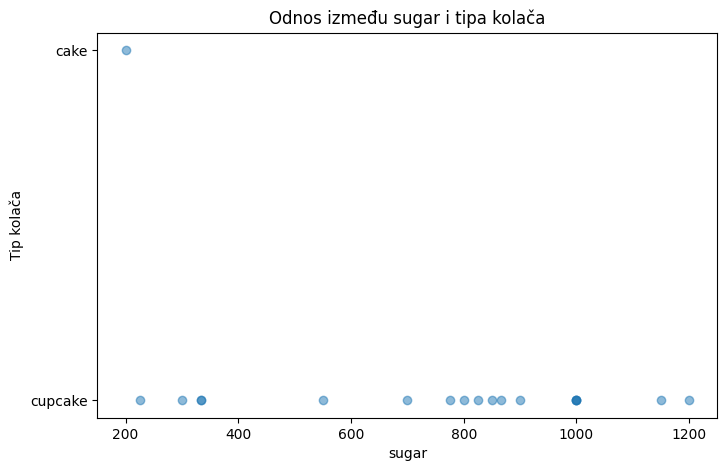

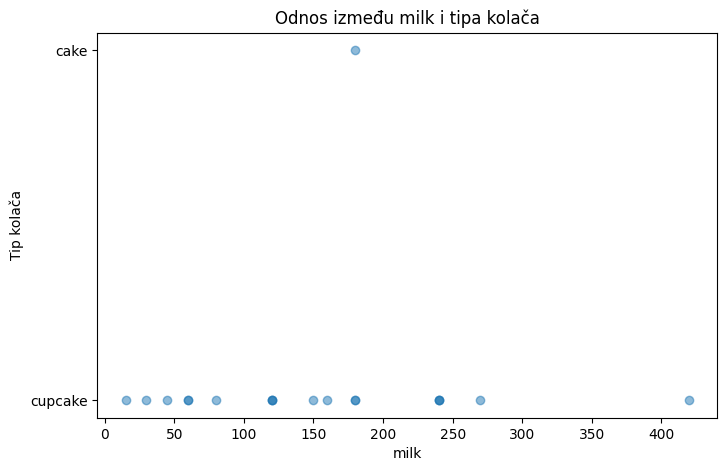

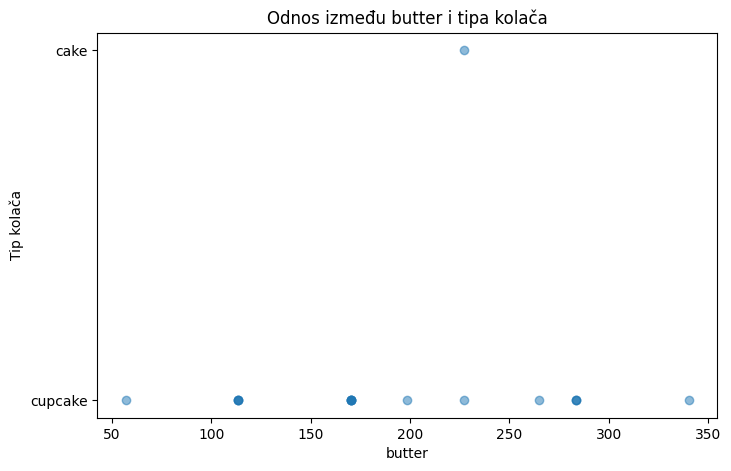

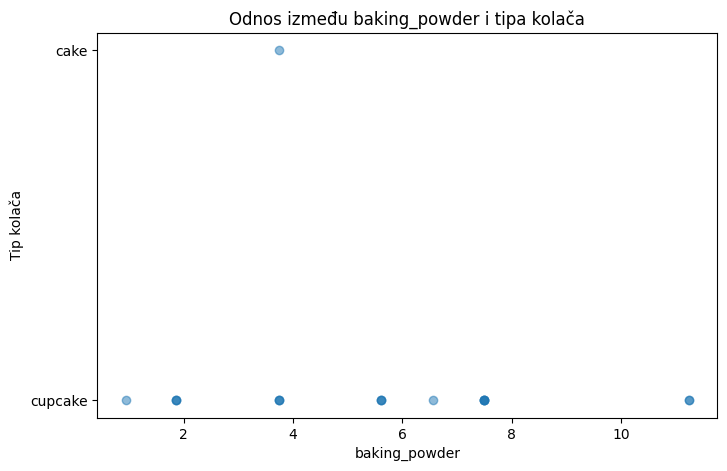

In [12]:
# Prikaz scatter plot-ova za svaki atribut u odnosu na tip kolača
for column in data.columns[:-1]:  # Preskačemo poslednju kolonu koja sadrži tip kolača
    plt.figure(figsize=(8, 5))
    plt.scatter(data[column], data['type'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Tip kolača')
    plt.title(f'Odnos između {column} i tipa kolača')
    plt.show()


Nova tačka pripada klasi: cupcake


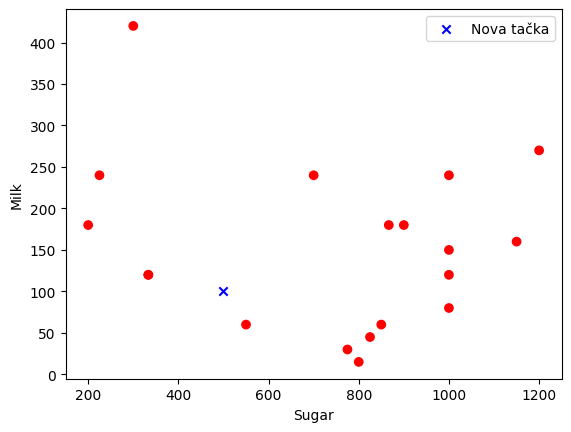

In [3]:
#Da bismo implementirali K-najbližih suseda (KNN) na ovom skupu podataka, prvo ćemo razdvojiti podatke na ulaze (nezavisne promenljive) i izlaz (zavisnu promenljivu). 
#U ovom slučaju, izlaz predstavlja tip kolača (cupcake). Nakon toga, možemo primeniti KNN algoritam na ove podatke.

#Euclidean_distance: Funkcija koja računa Euklidsko rastojanje između dve tačke u dvodimenzionalnom prostoru.
#Get_Neighbors: Funkcija koja pronalazi k najbližih suseda za zadatu novu tačku u skupu podataka. Vraća niz tačaka (suseda) sortiranih po rastojanju od nove tačke.
#predict_classification: Funkcija koja koristi k najbližih suseda da predvidi klasu nove tačke. Bira klasu koja se najčešće pojavljuje među susedima.
#Demonstracija korišćenja funkcija za određeni skup podataka (dataset) i novu tačku (new_data). Takođe, prikazuje se grafik koji prikazuje raspodelu tačaka i novu tačku, sa obojenim susedima i predviđenom klasom.
#Na kraju, novi element (nova tačka) se klasifikuje pomoću KNN algoritma, a rezultat se prikazuje na grafiku. Raspodela tačaka prikazana je u crvenim, zelenim i plavim bojama, a nova tačka koja se klasifikuje označena je žutom bojom na grafiku.

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

# Skup podataka
dataset = [
    [181.33, 1, 1200.00, 270.00, 283.75, 5.62, 'cupcake'],
    [136.00, 2, 1000.00, 80.00, 113.50, 1.87, 'cupcake'],
    [136.00,3,775.00,30.00,283.75,7.50,'cupcake'],
    [204.00,2,1000.00,120.00,340.50,6.56,'cupcake'],
    [181.33,2,825.00,45.00,227.00,0.94,'cupcake'],
    [110.50,2,333.33,120.00,170.25,1.87,'cupcake'],
    [110.50,2,333.33,120.00,170.25,1.87,'cupcake'],
    [238.00,1,900.00,180.00,170.25,5.62,'cupcake'],
    [272.00,2,1000.00,240.00,56.75,7.50,'cupcake'],
    [272.00,3,1000.00,150.00,113.50,5.62,'cupcake'],
    [204.00,2,800.00,15.00,113.50,7.50,'cupcake'],
    [340.00,2,1150.00,160.00,198.63,3.75,'cupcake'],
    [306.00,2,866.67,180.00,170.25,11.25,'cupcake'],
    [272.00,4,850.00,60.00,170.25,7.50,'cupcake'],
    [153.00,1,225.00,240.00,113.50,3.75,'cupcake'],
    [238.00,4,300.00,420.00,170.25,3.75,'cupcake'],
    [238.00,3,550.00,60.00,264.83,7.50,'cupcake'],
    [340.00,3,700.00,240.00,283.75,11.25,'cupcake'],
    [170.00, 4, 200.00, 180.00, 227.00, 3.75, 'cupcake']
]

# Nova tačka koju želimo klasifikovati
new_data = [150.00, 2, 500.00, 100.00, 120.00, 2.50, 'unknown']

def Euclidean_distance(first, second):
    return sqrt(((first[0] - second[0]) ** 2) + ((first[1] - second[1]) ** 2))

def Get_Neighbors(dataset, new_data, k):
    distance = list()
    data = []
    for i in dataset:
        dist = Euclidean_distance(new_data[:-1], i[:-1])
        distance.append(dist)
        data.append(i)
    distance = np.array(distance)
    data = np.array(data)
    index_dist = distance.argsort()
    data = data[index_dist]
    neighbors = data[:k]
    return neighbors

def predict_classification(dataset, new_data, k):
    Neighbors = Get_Neighbors(dataset, new_data, k)
    Classes = []
    for i in Neighbors:
        Classes.append(i[-1])
    prediction = max(set(Classes), key=Classes.count)
    return prediction

# Klasifikacija nove tačke
prediction = predict_classification(dataset, new_data, 3)
print(f'Nova tačka pripada klasi: {prediction}')

# Prikaz grafika sa susedima
colors = ['red' if point[-1] == 'cupcake' else 'green' for point in dataset]
plt.scatter([point[2] for point in dataset], [point[3] for point in dataset], c=colors)
plt.scatter(new_data[2], new_data[3], c='blue', marker='x', label='Nova tačka')
plt.xlabel('Sugar')
plt.ylabel('Milk')
plt.legend()
plt.show()
